# Customer Churn Analysis

### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the customer churn dataset
df = pd.read_csv("Customer Churn Analysis.csv")

In [4]:
pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


"Churn" is our target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#here using astype function and to_numeric function to change the datatypes of following columns.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.shape

(7043, 21)

The dataset contains :

Number of columns = 21

number of rows = 7043

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Null values in the feature Total charges

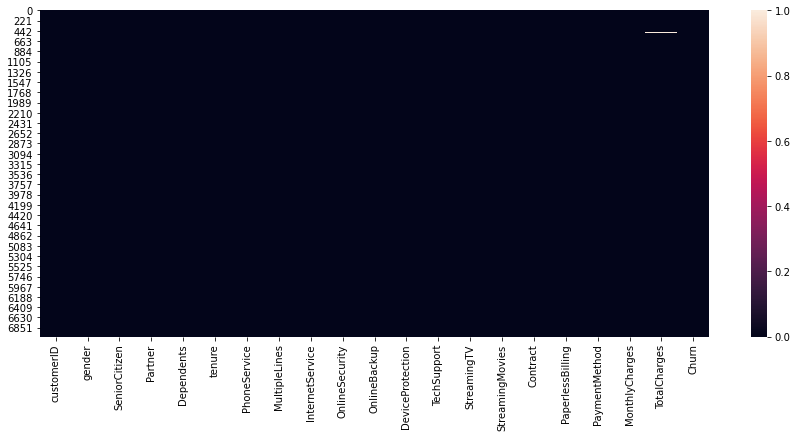

In [10]:
plt.figure(figsize = [15,6])
sns.heatmap(df.isnull())

Since there are white spots or boxes(respresent null values) present in the graph.therefore,null values are present in the feature 'TotalCharge'.

In [11]:
#handling null values
df["TotalCharges"] = df["TotalCharges"].replace(np.NaN,df["TotalCharges"].median())
df["TotalCharges"].isnull().sum()

0

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Senior citizen comprises of 0 and 1 which implies that the customer is not a senior or a senior citizen respectively.

Right now its od int type so we'll be converting it to object type.

In [13]:
df_continous = df[["tenure","MonthlyCharges","TotalCharges"]]

In [42]:
print("observations:")
for i in df_continous:
    print("Mean of the ",i,"is :", round(df_continous[i].mean(),3))
    print("Median of the ",i,"is :",round(df_continous[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(df_continous[i].std(),3))
    print("Minimum value of ",i,"is :", round(df_continous[i].min(),3))
    print("75th Quantile of ",i,"is :", round(df_continous[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(df_continous[i].max(),3))
    x = input("Observation : \n")
    print("\n\n")

observations:
Mean of the  tenure is : 32.371
Median of the  tenure is : 29.0
Standard deviation of  tenure is : 24.559
Minimum value of  tenure is : 0
75th Quantile of  tenure is : 55.0
Maximum value of  tenure is : 72
Observation : 
the mean is greater than the median means that feature is a bit right skewed.Also, standard deviation is also large.There is very less difference between 75th percentile and maximum value.



Mean of the  MonthlyCharges is : 64.762
Median of the  MonthlyCharges is : 70.35
Standard deviation of  MonthlyCharges is : 30.09
Minimum value of  MonthlyCharges is : 18.25
75th Quantile of  MonthlyCharges is : 89.85
Maximum value of  MonthlyCharges is : 118.75
Observation : 
the mean is greater than the median means that feature is a bit right skewed.Also, standard deviation is also large.There is less difference between 75th percentile and maximum value.



Mean of the  TotalCharges is : 2283.3
Median of the  TotalCharges is : 1397.475
Standard deviation of  Total

In [19]:
#visualization of features
df_categorical = df[["gender","Partner","Dependents","PhoneService","InternetService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn","SeniorCitizen"]]

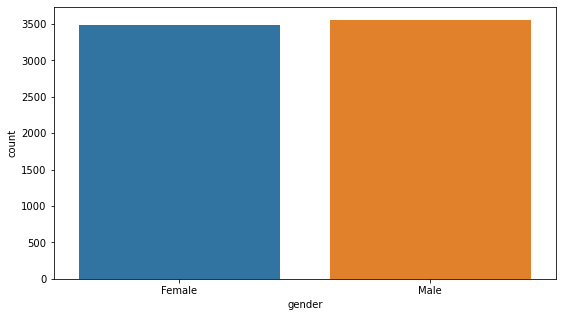

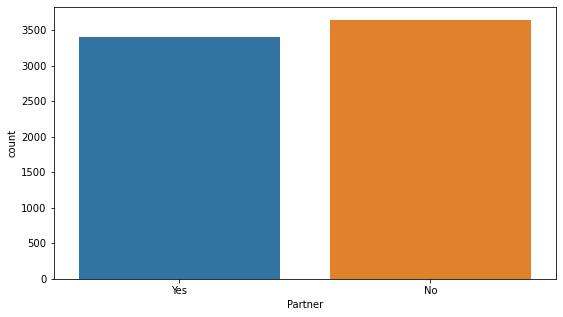

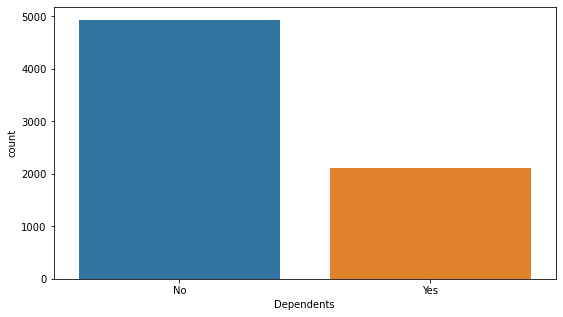

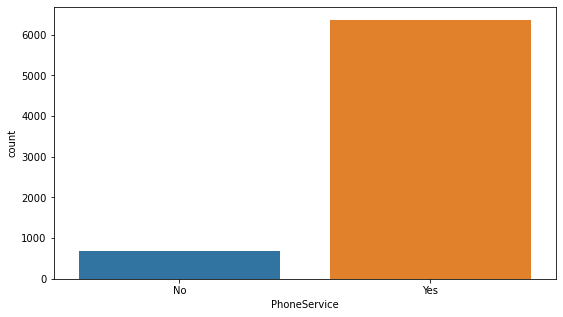

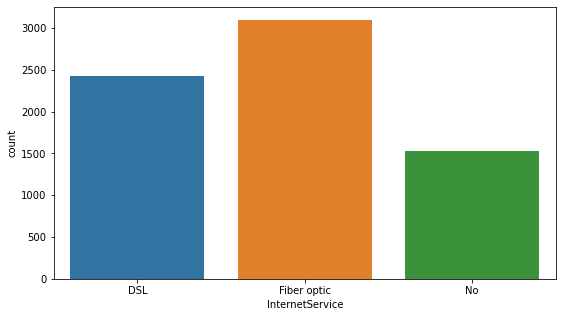

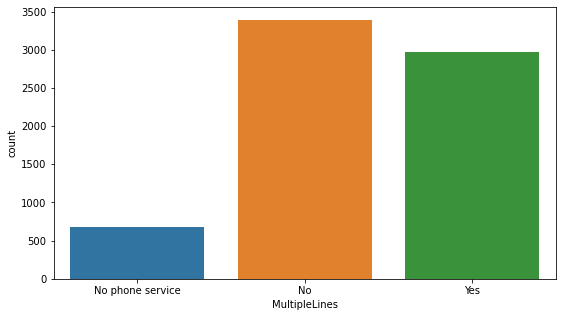

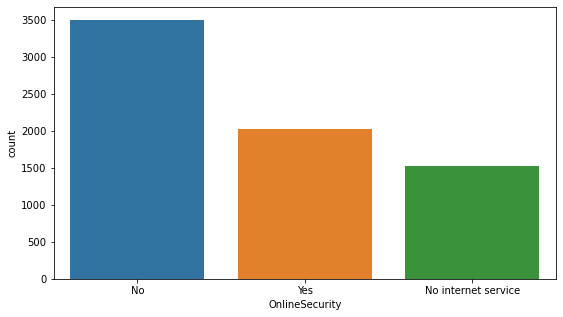

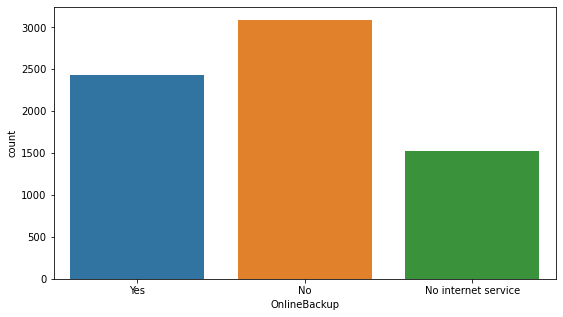

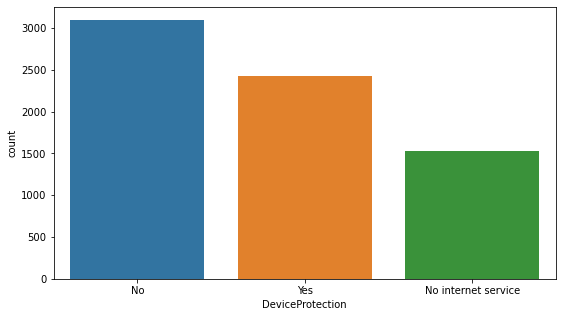

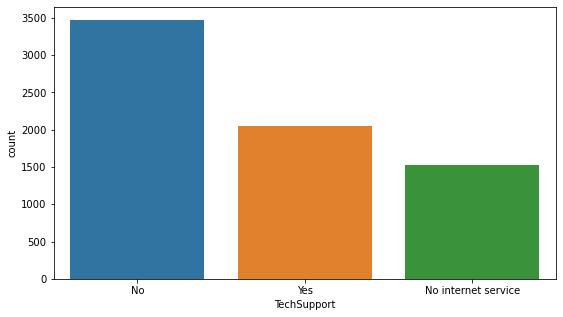

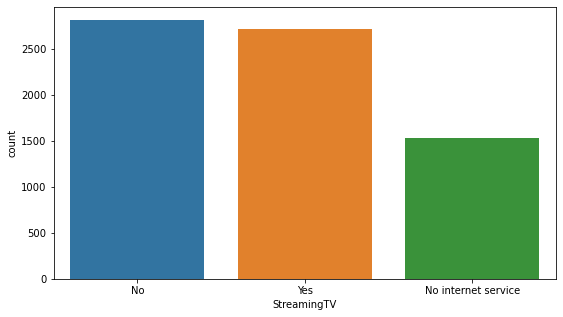

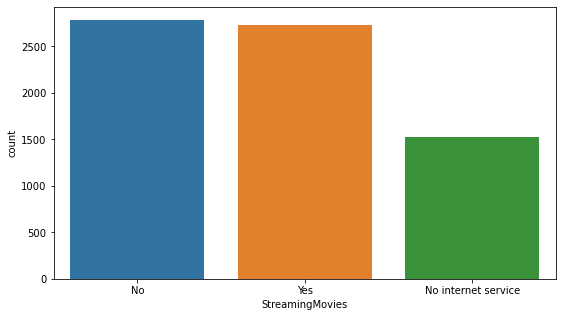

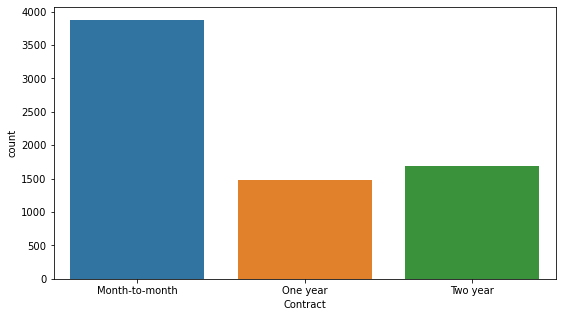

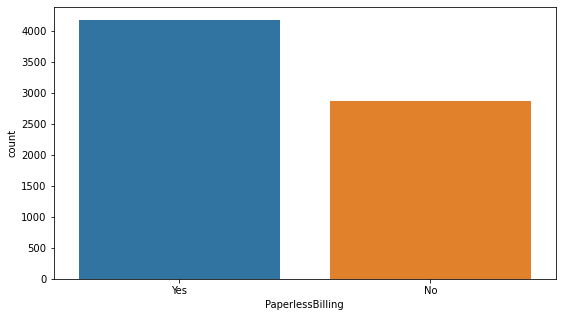

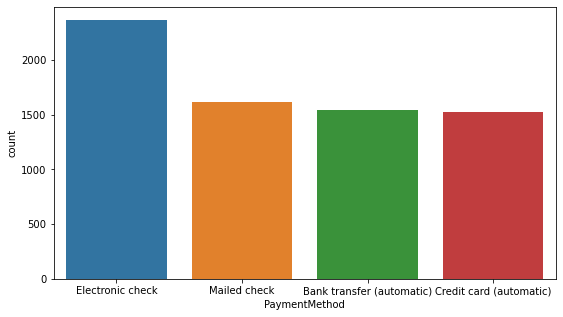

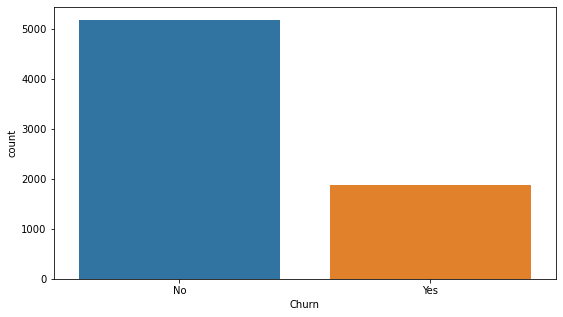

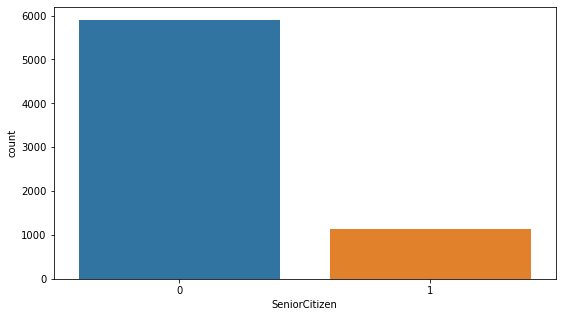

In [20]:
for i in df_categorical:
    plt.figure(figsize = [9,5])
    sns.countplot(df[i])
    plt.show()

<Figure size 432x360 with 0 Axes>

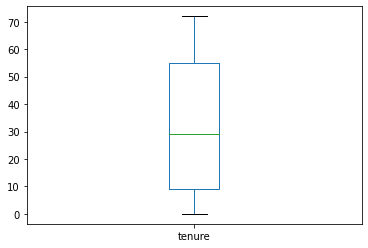

<Figure size 432x360 with 0 Axes>

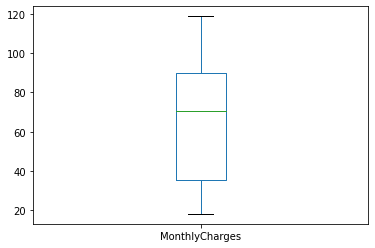

<Figure size 432x360 with 0 Axes>

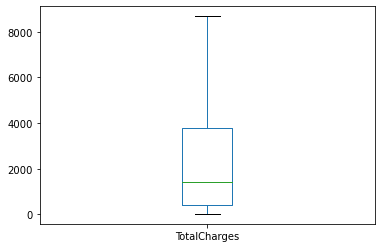

In [16]:
for i in df_continous:
    plt.figure(figsize = [6,5])
    df_continous[[i]].plot.box()
    plt.show()

no outliers are present in any of the continous feature.

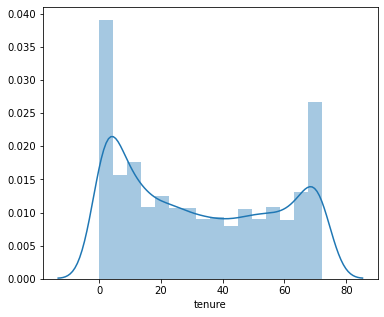

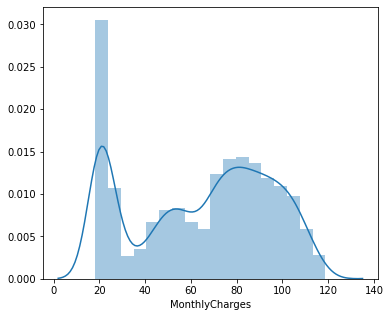

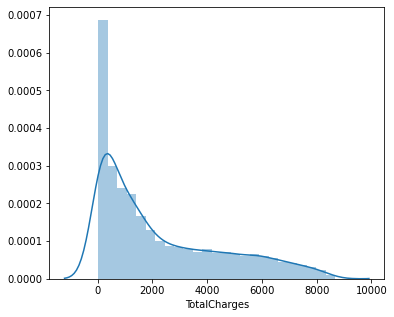

In [17]:
for i in df_continous:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(df_continous[[i]],kde = True)
    plt.show()

observation: Total charges is highly right skewed.

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
for i in df_categorical:
    df[[i]] = le.fit_transform(df_categorical[[i]])

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [24]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

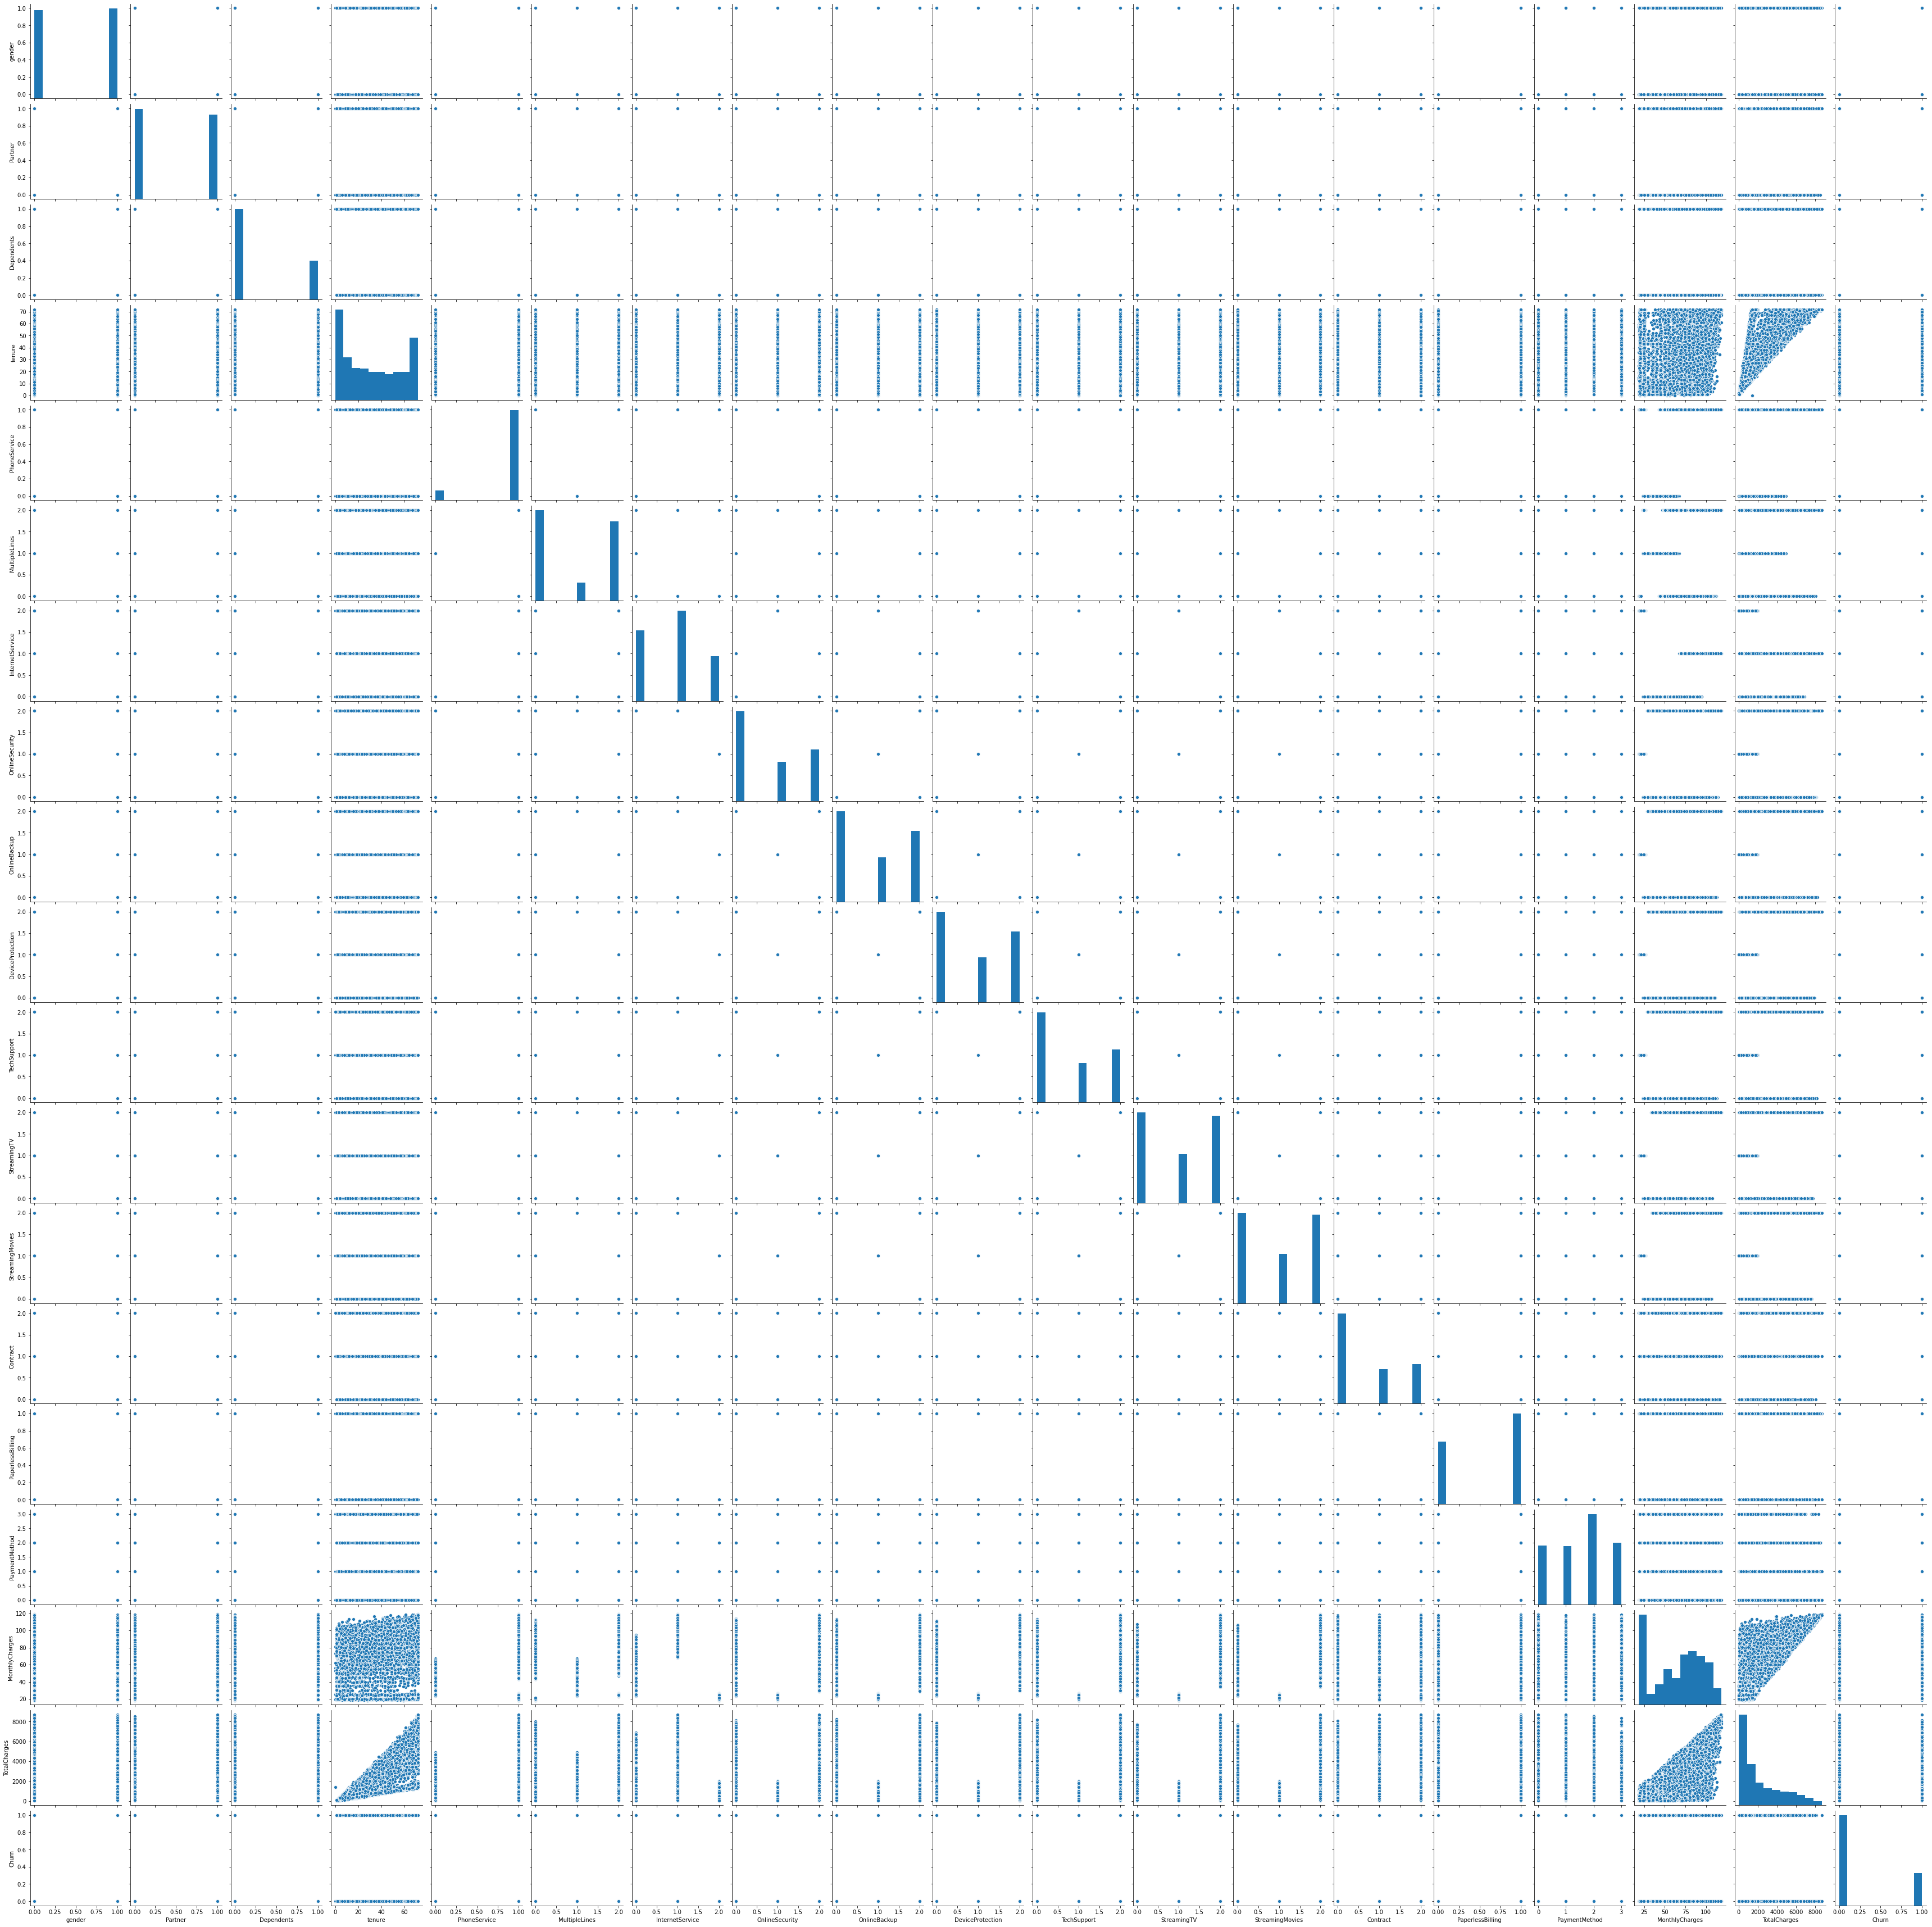

In [66]:
sns.pairplot(df)

In [25]:
#graphical visualization

In [28]:
#creating a list of variables which we'll plot with target variable
df_plot = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

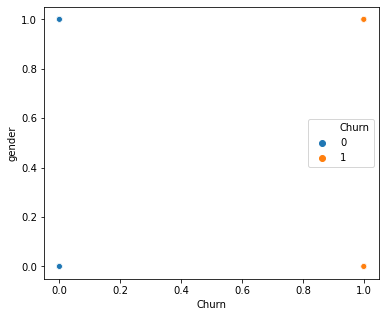

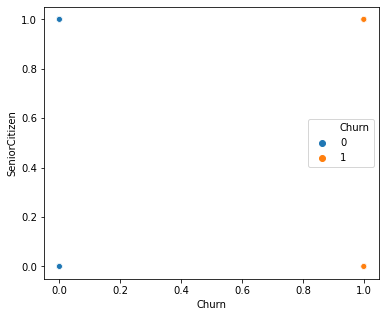

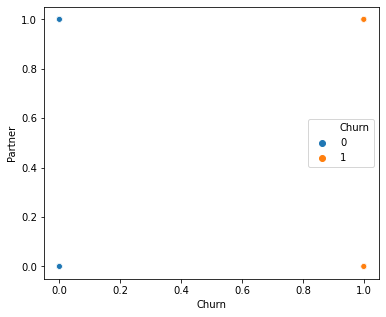

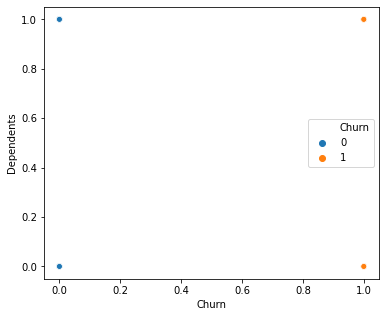

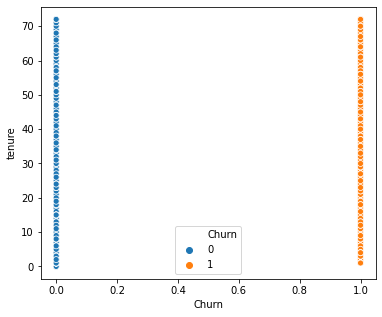

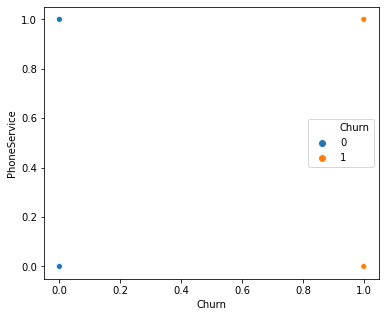

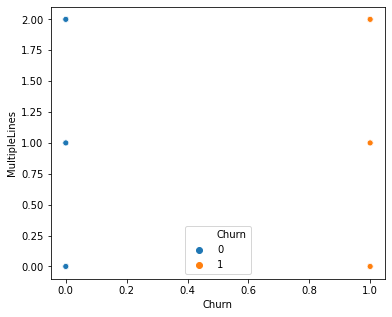

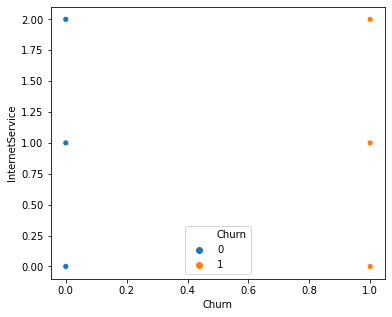

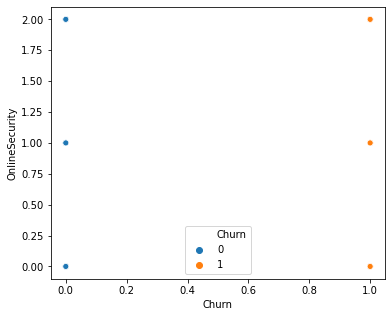

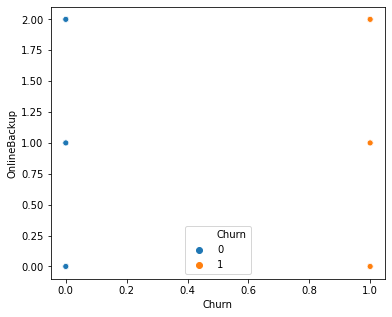

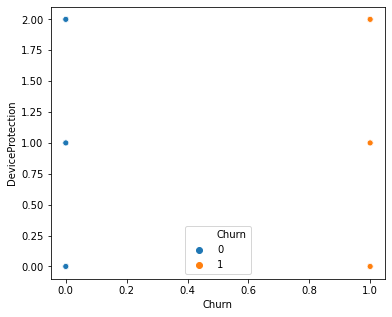

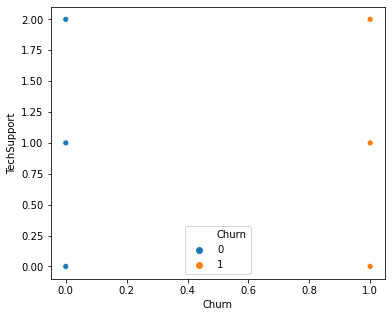

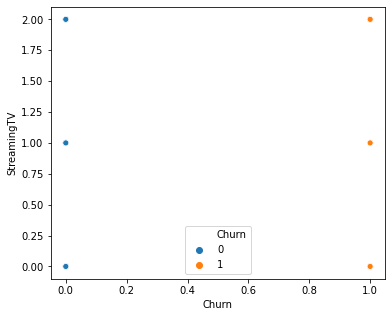

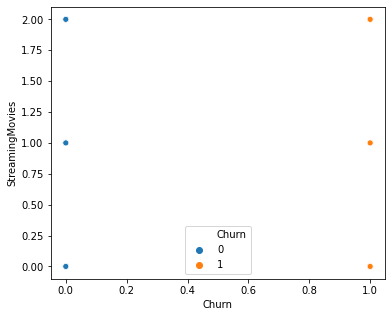

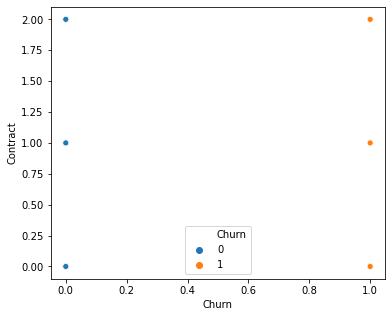

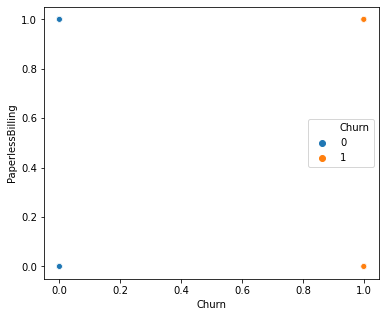

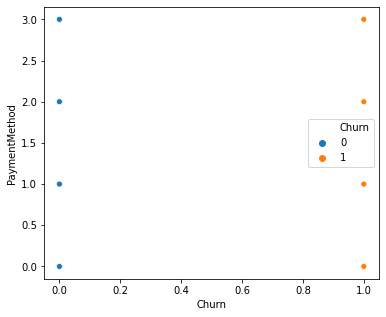

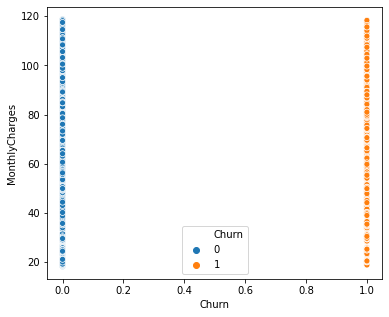

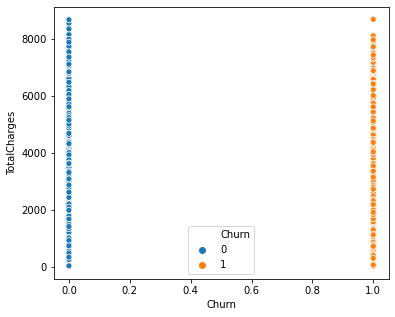

In [30]:
#we will see relationship of all the features with the target variable using scatterplot.
for i in df_plot:
    plt.figure(figsize = [6,5])
    x = df["Churn"]
    y = df_plot[i]
    plt.xlabel("Churn")
    plt.ylabel(i)
    sns.scatterplot(x,y , hue = df["Churn"])
    plt.show()

observation: No insights can be developed from the graphs.

In [32]:
#Checking correlation
corr_matrix = df.corr()

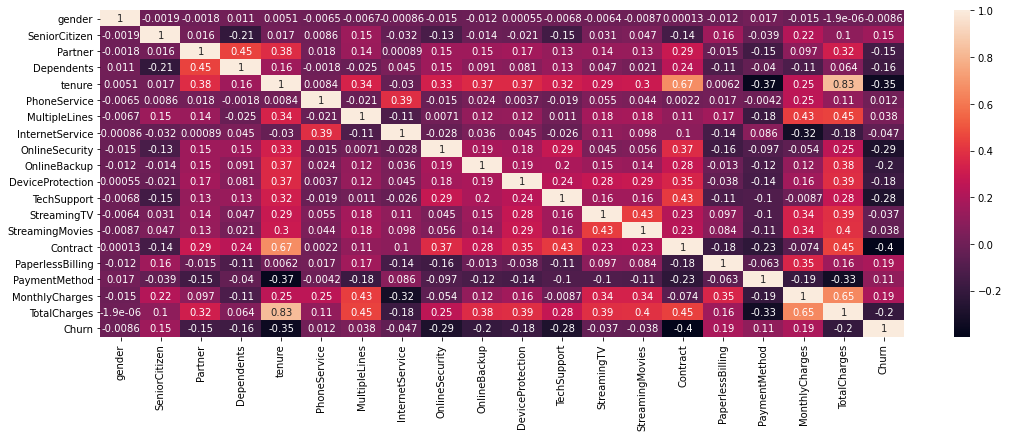

In [36]:
plt.figure(figsize = [18,6])
sns.heatmap(corr_matrix,annot = True)

In [39]:
#now we'll look at  the correlation of the all variables with the target variable
corr=corr_matrix['Churn'].sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr

,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


Observation: MonthlyCharges and Contracts are highly correlated with target feature "Churn" with corelation value (0.193356) and (-0.396713) resectively.whereas gender is least correlated to the target feature.

In [41]:
#We'll check if any skewness is present in each of the variables
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

observation: As most of the features are of categorical type we'll not remove the skewness from them.

In [46]:
#spliting the data into x and y
x1 = df.drop(["Churn"],axis = 1)
y = df["Churn"]

keeping the skewness between +/- 5.

we'll be removing skewness from the variable Total Charges.

In [48]:
from scipy.stats import boxcox
x1["TotalCharges"] = boxcox(x1["TotalCharges"],0)
x1["TotalCharges"].skew()

-0.7549990627862947

In [53]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
x1["TotalCharges"] = power.fit_transform(x1[["TotalCharges"]])
x1["TotalCharges"].skew()

-0.2274724148188579

In [54]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for i in df_continous:
    x1[i]= ms.fit_transform(x1[[i]])

In [57]:
#dropping the column customer id as it do not have any relation with the target variable.
x1 = df.drop(["customerID"],axis = 1)

In [62]:
x1.shape , y.shape

((7043, 20), (7043,))

In [59]:
#for random_state check
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size =.20,random_state = i)
    le = LogisticRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = accuracy_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  1.0 at random state :  4


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size =.20,random_state = 4)

In [64]:
#first using Logistic regression to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

1.0
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

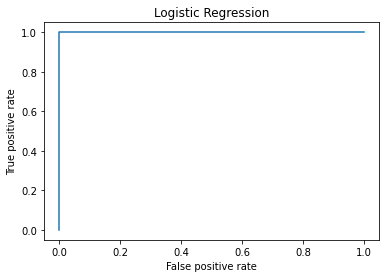

In [66]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

as we can see that the area under the curve for logistic regression is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [67]:
#Using Random Forest Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

1.0
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

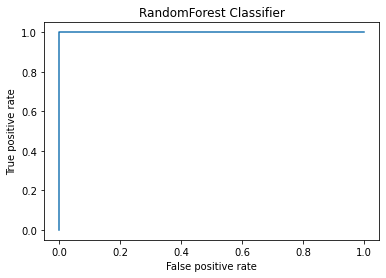

In [68]:
#using aoc roc curve to check how efficiently model is learning
y_pred_prob = rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'RandomForest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest Classifier')
plt.show()

as we can see that the area under the curve for RandomForest Classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [ ]:
#Using DecisionTree Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

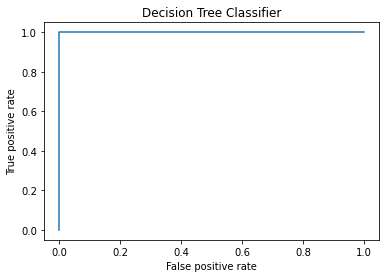

In [71]:
#using aoc roc curve to check how efficiently model is learning
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label = 'Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

as we can see that the area under the curve for Decision tree classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [85]:
#Using Support Vector Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
prdsvc = svc.predict(x_test)
print(accuracy_score(y_test,prdsvc))
print(confusion_matrix(y_test,prdsvc))
print(classification_report(y_test,prdsvc))

1.0
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

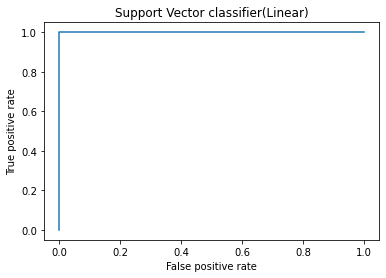

In [84]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label = 'Support Vector classifier(Linear)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector classifier(Linear)')
plt.show()

as we can see that the area under the curve for Support Vector classifier(Linear) is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [75]:
#checking accuracy of support vector machine on different kernels.
kernelsvc = ["rbf","poly"]
for i in kernelsvc:
    svc = SVC(kernel = i)
    svc.fit(x_train,y_train)
    prdsvc = svc.predict(x_test)
    print("Showing result for Support Vector Classification Model : ", i)
    print(accuracy_score(y_test,prdsvc))
    print(confusion_matrix(y_test,prdsvc))
    print(classification_report(y_test,prdsvc)) 

Showing result for Support Vector Classification Model :  rbf
0.7345635202271115
[[1035    0]
 [ 374    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409

Showing result for Support Vector Classification Model :  poly
0.7345635202271115
[[1035    0]
 [ 374    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



Observation: Looking at both the models we concluded that neither of the model is learning for 0 class. All the values for 0 class is classified as false positive by the model. Thats why the precision,recall and f1 score is 0 for this class.So we can say that model is not learning effectively.

In [76]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print(accuracy_score(y_test,prdgbc))
print(confusion_matrix(y_test,prdgbc))
print(classification_report(y_test,prdgbc))

1.0
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

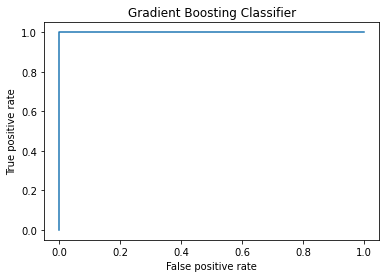

In [77]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label = 'Gradient Bossting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()

as we can see that the area under the curve for Gradient boosting classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

Conclusion : Almost the models we tested for model building shows 100 percent accuracy.So we'll use cross validation score to check which model is actually learning efficiently.

In [79]:
#using cross validation score to check the actual learning of models

In [80]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x1,y,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean())

Cross validation score of Logistic Regression is  0.9985801503322793


In [81]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dtc,x1,y,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  1.0


In [82]:
scr = cross_val_score(rfc,x1,y,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  1.0


In [86]:
scr = cross_val_score(svc,x1,y,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  1.0


In [87]:
scr = cross_val_score(gbc,x1,y,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  1.0


Conclusion: From the above cross validation scores of different models we conclude that Desicion tree classifier , Random forest classifier and gradient bosting classifier shows same cross validation score.So we can choose any of the model.

Choosing Random forest classifier model

In [88]:
#doing Hyperparameter tuning of random forest
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'n_estimators' : [10,100],
              'max_depth' : np.arange(2,7),
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2']}

In [89]:
GVC = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [90]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [91]:
#checking the best parameters
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [92]:
#using the parameters in random forest classifier to create model
modrfc = RandomForestClassifier(criterion = 'gini',max_depth = 4,max_features = 'sqrt',n_estimators = 100,random_state = 4)
modrfc.fit(x_train,y_train)
pred = modrfc.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 100.0


The accuracy of the Random forest classifier model is 100 percent on the given parameters.

In [94]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [96]:
#checking the accuracy of the model.
conclusion = pd.DataFrame([modrfc.predict(x_test)[:],prdrfc[:]],index = ["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [97]:
#saving the model using jobib
import joblib
joblib.dump(modrfc,"Customer churn.pkl")

['Customer churn.pkl']